In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from time import time
import sompy

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
dFrame = pd.read_csv('somDataset.csv')

In [4]:
quakeRecArr  = dFrame.to_records(index=False)

update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0 to DejaVu Sans ('C:\\Users\\afiqAUT\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos


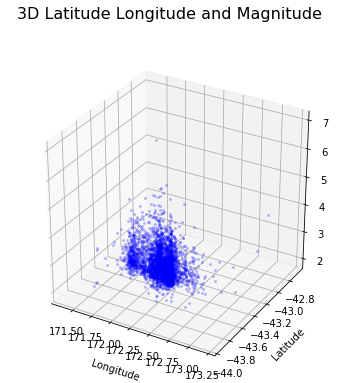

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot( 111 , projection='3d')
plot.suptitle('3D Latitude Longitude and Magnitude', fontsize=16)
ax.plot(quakeRecArr['longitude'], 
        quakeRecArr[' latitude'], 
        quakeRecArr[' magnitude'],  
        'ob', alpha=0.2, markersize=2)

plot.axvline(x=172.16794, color = 'red', alpha=0.2, markersize=2)
plot.axhline(y=-43.52731, color = 'red', alpha=0.2, markersize=2)

ax.set_xlabel('\nLongitude')
ax.set_ylabel('\nLatitude')

fig.set_size_inches(6,6)

plt.show()


update_title_pos
update_title_pos
update_title_pos
update_title_pos


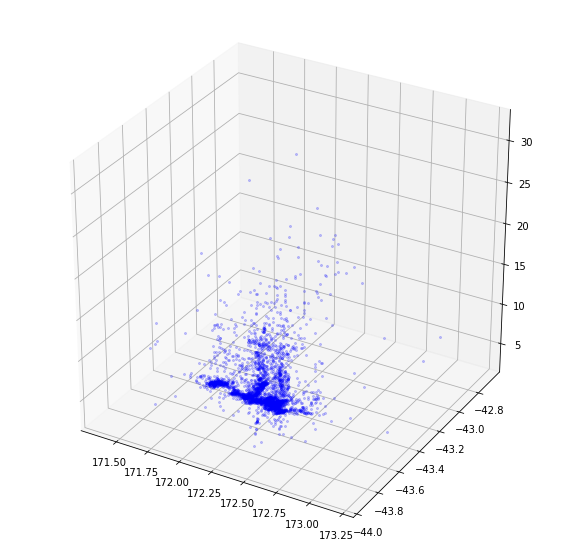

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(quakeRecArr['longitude'], 
        quakeRecArr[' latitude'], 
        quakeRecArr[' depth'],  
        'ob', alpha=0.2, markersize=2)

fig.set_size_inches(10,10)

plt.show()

In [3]:
dFrame = pd.read_csv('somDataset2.csv')
quakeDat = dFrame.to_records(index=False)
quakeDatNP = np.array(quakeDat.tolist())



In [4]:
quakeDatNP

array([[172.32367, -43.55426,   5.815  ,  10.0257 ],
       [172.38512, -43.6585 ,   5.114  ,   7.8273 ],
       [172.29477, -43.5661 ,   5.532  ,  11.8823 ],
       ...,
       [171.88284, -43.59351,   2.461  ,   5.     ],
       [172.41629, -43.64249,   3.559  ,  14.2303 ],
       [171.75114, -43.56247,   2.662  ,   5.     ]])

In [5]:
mapsize = [12,12] #
som = sompy.SOMFactory.build(quakeDatNP, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
 pca_linear_initialization took: 0.005000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 2

 epoch: 1 ---> elapsed time:  0.105000, quantization error: 1.044738

 epoch: 2 ---> elapsed time:  0.105000, quantization error: 0.886693

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 2

 epoch: 1 ---> elapsed time:  0.104000, quantization error: 0.650499

 epoch: 2 ---> elapsed time:  0.112000, quantization error: 0.589455

 Final quantization error: 0.589455
 train took: 0.435000 seconds


In [8]:
v = sompy.mapview.View2DPacked(12, 12, 'test',text_size=8)  
v

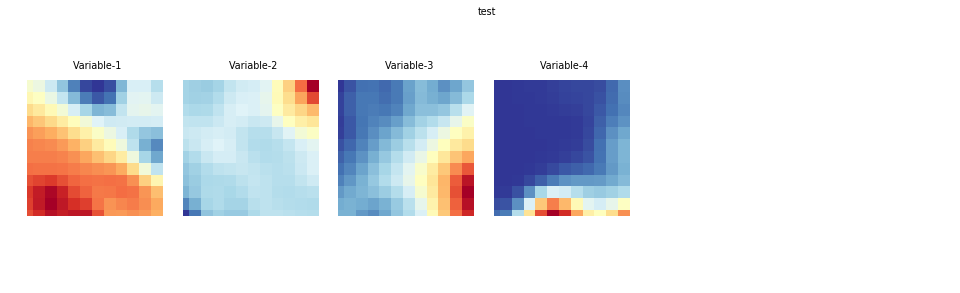

In [9]:
v = sompy.mapview.View2DPacked(12, 12, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1,2,3], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

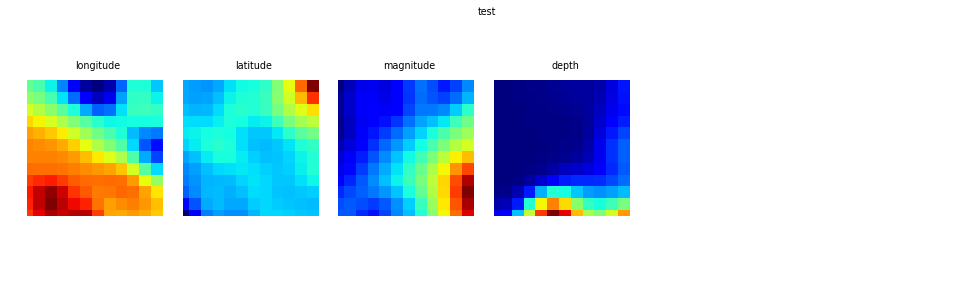

In [10]:
som.component_names = ['longitude','latitude','magnitude','depth']
v = sompy.mapview.View2DPacked(12, 12, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default

In [11]:
# c = sompy.mapview.View2DPacked()
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       1, 3, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2])

C:\Users\afiqAUT\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


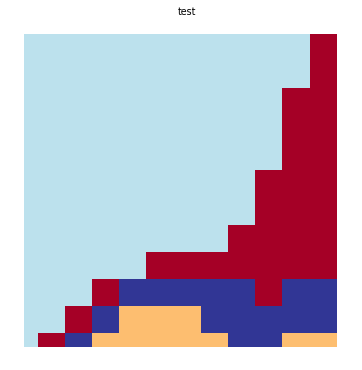

In [12]:
v.show(som, what='cluster')

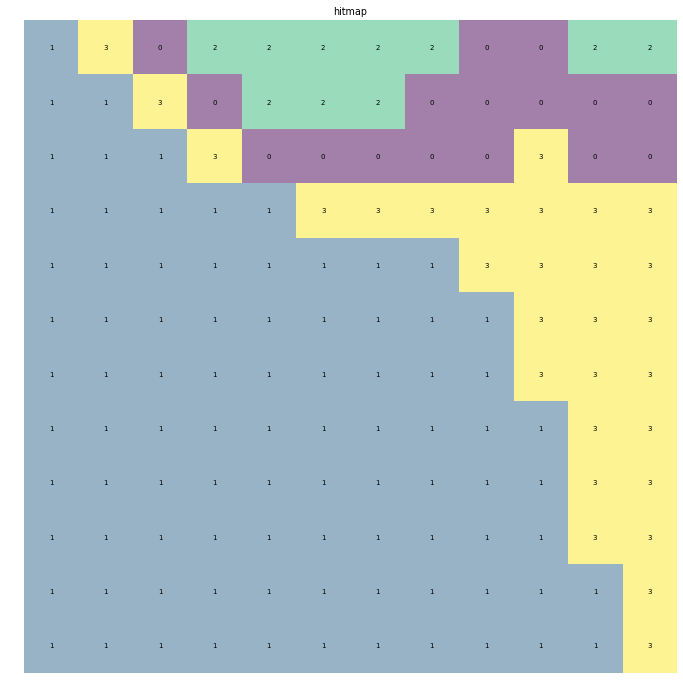

In [13]:
h = sompy.hitmap.HitMapView(12, 12, 'hitmap', text_size=10, show_text=True)
h.show(som)

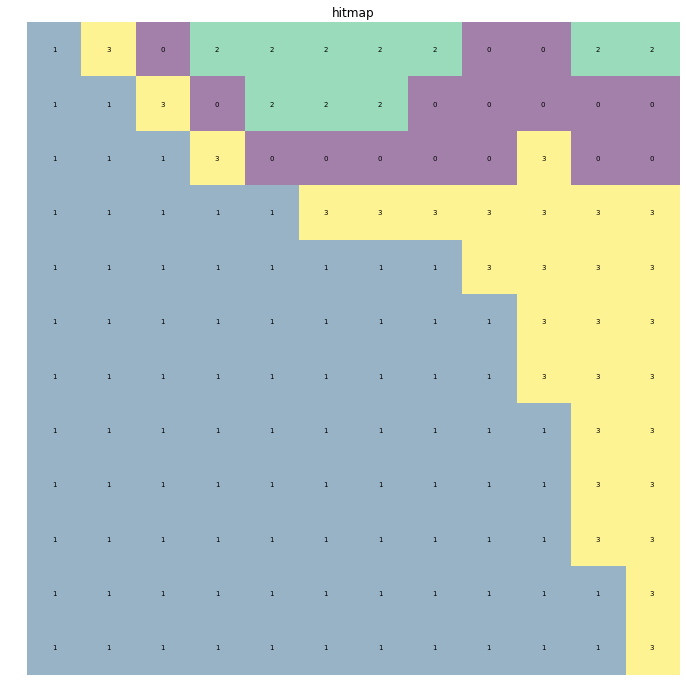

In [14]:
h2 = sompy.hitmap.HitMapView(12, 12, 'hitmap', text_size=12, show_text=True)
h2.show(som)

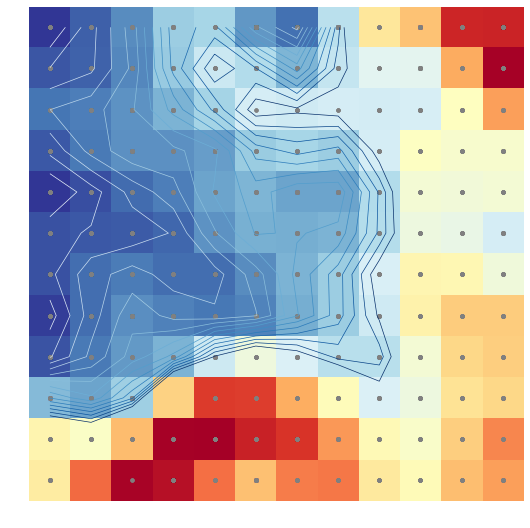

In [16]:
u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)